<a href="https://colab.research.google.com/github/jptvalota/Projetos-e-estudos-Machine-Learning-Python-JP-/blob/master/Semana3ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# =====================================================
# Aula Completa: Estatística e Probabilidade Aplicadas
# Autor: [Seu Nome]
# Data: [Data Atual]
# Objetivo: Estudo prático de estatística aplicada
# Ferramenta: Google Colab / Jupyter Notebook
# =====================================================

In [ ]:
# --- 1. Bibliotecas ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
# Configurações de visualização
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [ ]:
# --- 2. Gerando um conjunto de dados fictício ---
np.random.seed(42)  # Reprodutibilidade
n = 200
dados = pd.DataFrame({
    "idade": np.random.normal(35, 10, n).astype(int),
    "salario": np.random.normal(5000, 1500, n),
    "horas_trabalho": np.random.normal(40, 5, n),
    "setor": np.random.choice(["TI", "Vendas", "RH", "Financeiro"], size=n)
})
# Garantir que não haja salários negativos
dados["salario"] = dados["salario"].apply(lambda x: x if x > 0 else np.abs(x))

dados.head()

,idade,salario,horas_trabalho,setor
0,39,5536.681041,32.027862,RH
1,33,5841.176790,37.003125,Financeiro
2,41,6624.576865,40.026218,Financeiro
3,50,6580.703078,40.234903,TI
4,32,2933.495948,37.749673,Vendas


In [ ]:
# --- Estatísticas descritivas ---
print("Resumo Estatístico:")
dados.describe()


Resumo Estatístico:


,idade,salario,horas_trabalho
count,200.000000,200.000000,200.000000
mean,34.050000,5128.802280,39.571725
std,9.343662,1480.505717,4.970210
min,8.000000,138.098990,27.641777
25%,27.000000,4091.243693,36.030608
50%,34.500000,5118.259023,39.612000
75%,39.250000,6030.846711,42.860441
max,62.000000,10779.097236,55.394404


In [ ]:
# --- Médias ---
media_idade = dados["idade"].mean()
media_salario = dados["salario"].mean()
media_horas = dados["horas_trabalho"].mean()
print(f"Média Idade: {media_idade:.2f}")
print(f"Média Salário: {media_salario:.2f}")
print(f"Média Horas Trabalhadas: {media_horas:.2f}")

Média Idade: 34.05
Média Salário: 5128.80
Média Horas Trabalhadas: 39.57


In [ ]:
# --- Mediana ---
mediana_salario = dados["salario"].median()
print(f"Mediana Salário: {mediana_salario:.2f}")


Mediana Salário: 5118.26


In [ ]:
# --- Moda ---
moda_setor = dados["setor"].mode()[0]
print(f"Moda do Setor: {moda_setor}")

Moda do Setor: RH


In [ ]:
# Variância e Desvio Padrão
var_salario = dados["salario"].var()
std_salario = dados["salario"].std()
amplitude_salario = dados["salario"].max() - dados["salario"].min()

print(f"Variância Salário: {var_salario:.2f}")
print(f"Desvio Padrão Salário: {std_salario:.2f}")
print(f"Amplitude Salário: {amplitude_salario:.2f}")

Variância Salário: 2191897.18
Desvio Padrão Salário: 1480.51
Amplitude Salário: 10641.00


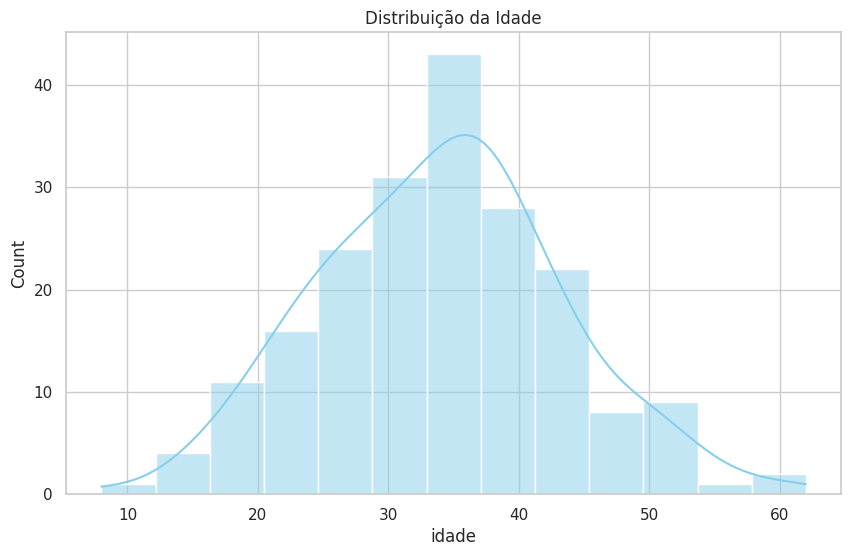

In [ ]:
# Histograma da idade
sns.histplot(dados["idade"], kde=True, color="skyblue")
plt.title("Distribuição da Idade")
plt.show()

/tmp/ipython-input-1401624386.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="setor", y="salario", data=dados, palette="pastel")


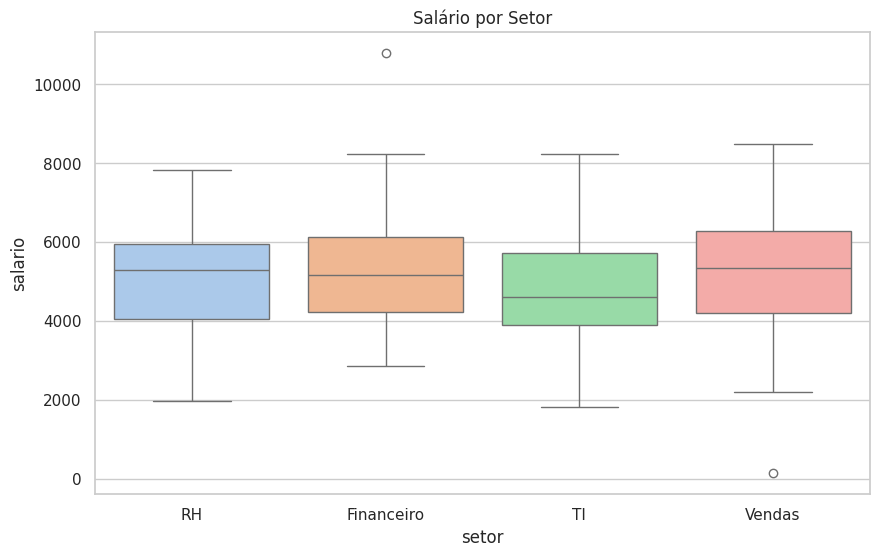

In [ ]:
# Boxplot de salários por setor
sns.boxplot(x="setor", y="salario", data=dados, palette="pastel")
plt.title("Salário por Setor")
plt.show()

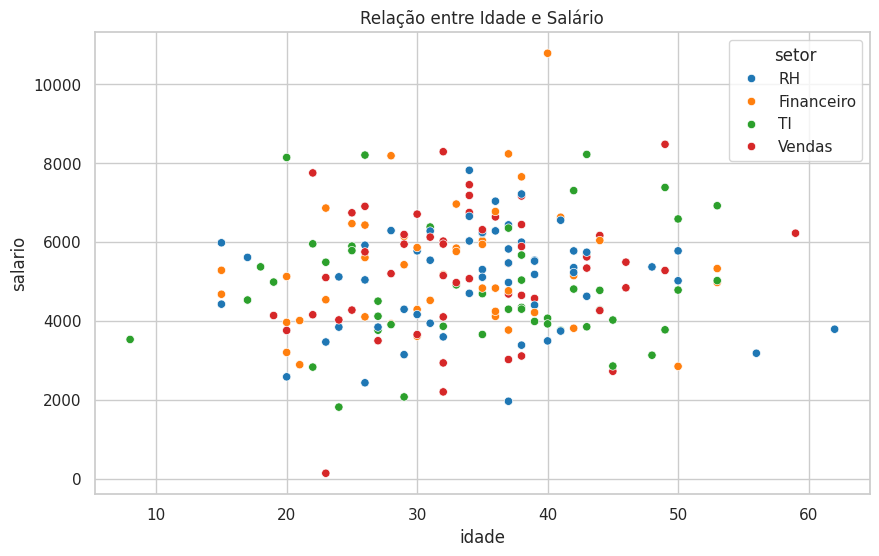

In [ ]:
# Dispersão idade vs salário

sns.scatterplot(x="idade", y="salario", hue="setor", data=dados, palette="tab10")
plt.title("Relação entre Idade e Salário")
plt.show()

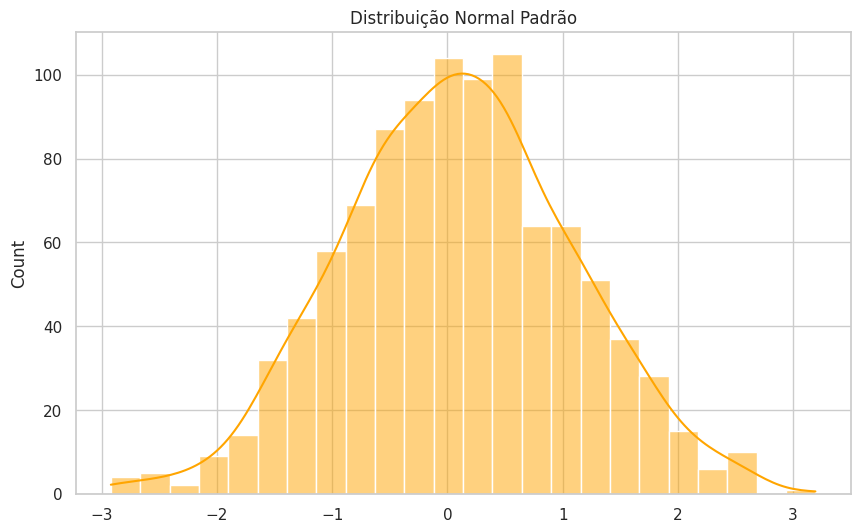

In [ ]:
# --- Distribuição Normal ---
mu, sigma = 0, 1
normal_data = np.random.normal(mu, sigma, 1000)

sns.histplot(normal_data, kde=True, color="orange")
plt.title("Distribuição Normal Padrão")
plt.show()

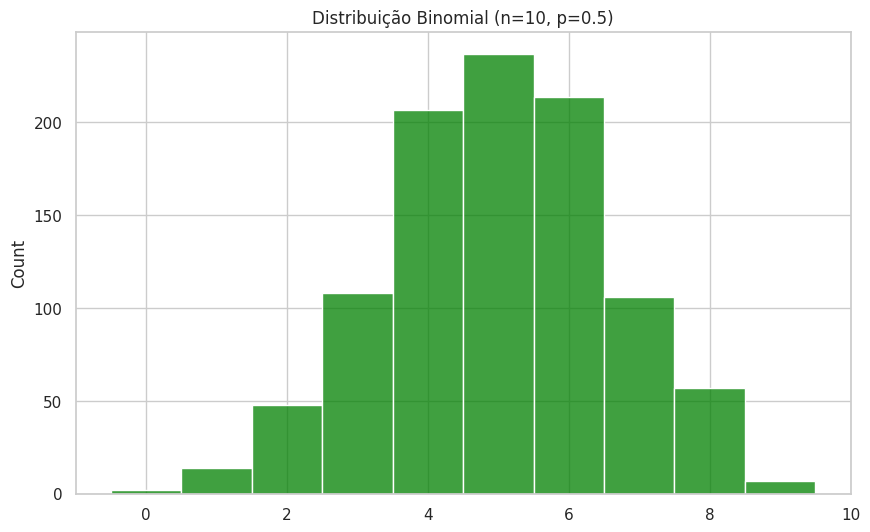

In [ ]:
# --- Distribuição Binomial ---
n_trials = 10
p_success = 0.5
binomial_data = np.random.binomial(n_trials, p_success, 1000)

sns.histplot(binomial_data, discrete=True, color="green")
plt.title("Distribuição Binomial (n=10, p=0.5)")
plt.show()


In [ ]:
# Teste t — Verifica se a média de um grupo difere significativamente de um valor.
# Hipótese: média salarial = 5000
t_stat, p_val = stats.ttest_1samp(dados["salario"], 5100)

print(f"t-stat: {t_stat:.4f}, p-valor: {p_val:.4f}")
if p_val < 0.05:
    print("Rejeitamos H0: Média salarial é diferente de 5000")
else:
    print("Não rejeitamos H0: Não há evidência de diferença significativa")

t-stat: 0.2751, p-valor: 0.7835
Não rejeitamos H0: Não há evidência de diferença significativa


In [ ]:
# Tabela de contingência
contingencia = pd.crosstab(dados["setor"], dados["idade"] > 35)

chi2, p, dof, expected = stats.chi2_contingency(contingencia)

print(f"Chi2: {chi2:.4f}, p-valor: {p:.4f}")
if p < 0.05:
    print("Existe associação significativa entre setor e idade > 35")
else:
    print("Não existe associação significativa entre setor e idade > 35")

Chi2: 3.8934, p-valor: 0.2732
Não existe associação significativa entre setor e idade > 35


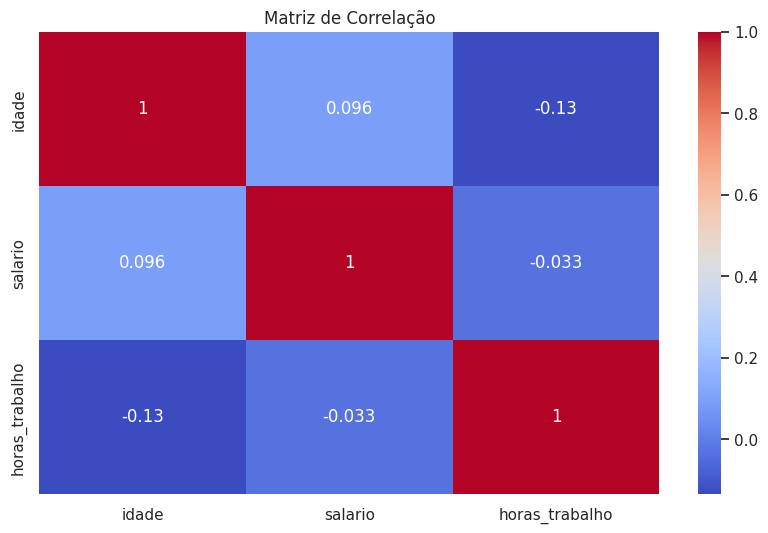

In [ ]:
#Correlação
corr = dados.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()

In [ ]:
"""
 Conclusões:
- Estatísticas descritivas ajudam a resumir grandes volumes de dados.
- Medidas de tendência central (média, mediana, moda) indicam valores típicos.
- Medidas de dispersão mostram a variação dos dados.
- Distribuições permitem modelar fenômenos aleatórios.
- Testes de hipóteses ajudam a validar suposições sobre dados.
- Correlações mostram possíveis relações entre variáveis.
"""

'\n Conclusões:\n- Estatísticas descritivas ajudam a resumir grandes volumes de dados.\n- Medidas de tendência central (média, mediana, moda) indicam valores típicos.\n- Medidas de dispersão mostram a variação dos dados.\n- Distribuições permitem modelar fenômenos aleatórios.\n- Testes de hipóteses ajudam a validar suposições sobre dados.\n- Correlações mostram possíveis relações entre variáveis.\n'